In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Data Preparation

In [25]:
#Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
df_crypto=pd.read_csv('crypto_data.csv')
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [26]:
df_crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [27]:
df_crypto.shape

(1252, 7)

In [28]:
#Discard all cryptocurrencies that are not being traded. Filter for currencies that are currently being traded. 
df_crypto = df_crypto[df_crypto['IsTrading']==True]
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


When filtering by "IsTrading" equals True, the number of rows in the dataframe dropped from 1252 records to 1144, showing that the filtering was effective.

In [29]:
#Once you have done this drop the IsTrading column from the dataframe.
df_crypto = df_crypto.drop(columns='IsTrading')
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [30]:
#Remove all rows that have at least one null value.
df_crypto = df_crypto.dropna()

In [31]:
df_crypto.shape

(685, 6)

By removing all null values using dropna(), the total number of rows dropped from 1144 to 685.

In [32]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be >0.
df_crypto = df_crypto[df_crypto["TotalCoinsMined"]>0]
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


Filtering byTotalCoinsMined >0 reduced the total number of records from 685 to 532.

In [33]:
#delete the CoinName from the original dataframe.
df_crypto.drop(['Unnamed: 0', 'CoinName'], axis=1, inplace= True)
df_crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [34]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data
X = pd.get_dummies(df_crypto, columns=['Algorithm', 'ProofType'], drop_first=True, dtype=float)
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.076842e+08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1242,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,7.296538e+06,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Examine the number of rows and columns of your dataset now. How did they change?
The number of rows conituned to drop as the dataset was filtered over and over, while the columns expanded significantly once we applied the Algorithm and Prooftype

In [35]:
#Standardize your dataset so that columns that contain larger values do not unduly influence outcome
scaler = StandardScaler()
df_crypto_scaled = scaler.fit_transform(X)

### Dimensionality Reduction

In [36]:
#For this project, preserve 90% of the explained variance in dimensionality reduction. 
#How did the number of the features change?
pca = PCA(n_components=.90)
pca_crypto = pca.fit_transform(df_crypto_scaled)
pca_crypto

array([[-3.35913620e-01,  1.04340531e+00, -5.37409264e-01, ...,
         3.96679829e-15,  3.94141861e-16,  4.12089890e-15],
       [-3.19248850e-01,  1.04354697e+00, -5.37804309e-01, ...,
         3.76673400e-15,  2.48085564e-16,  3.54700967e-15],
       [ 2.30471594e+00,  1.66999561e+00, -6.24076993e-01, ...,
         1.90287255e-15, -6.70621395e-14, -7.84013462e-14],
       ...,
       [ 3.24179380e-01, -2.32278089e+00,  3.87363001e-01, ...,
         2.30984177e-14, -1.10450886e-13, -4.04147217e-14],
       [-1.49546262e-01, -2.05899360e+00,  3.79619710e-01, ...,
         3.96487794e-15, -1.96241433e-15,  2.89262126e-15],
       [-2.90587486e-01,  8.27023611e-01, -2.51533368e-01, ...,
         4.20517357e-15, -2.29657545e-15,  3.71707307e-15]])

In [40]:
pca_crypto_df = pd.DataFrame(data=pca_crypto)
pca_crypto_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,-4.364932e-14,3.249613e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,2.111954e-16,4.990967e-17,-1.589248e-18,-8.273444e-16,-2.107261e-15,-6.460354e-15,-2.188289e-15,3.966798e-15,3.941419e-16,4.120899e-15
1,-0.319249,1.043547,-0.537804,0.001337,-4.370949e-14,3.260245e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,2.395980e-16,1.304518e-16,-1.085666e-16,-1.051750e-15,-2.228620e-15,-6.550097e-15,-2.226101e-15,3.766734e-15,2.480856e-16,3.547010e-15
2,2.304716,1.669996,-0.624077,0.004420,-6.792539e-14,4.166980e-14,-0.062312,-1.554093,-0.945690,0.375087,...,-1.174593e-14,8.191332e-15,-7.242621e-14,-3.341046e-14,4.608958e-14,1.395859e-14,1.547672e-14,1.902873e-15,-6.706214e-14,-7.840135e-14
3,-0.145455,-1.323925,0.177429,-0.001167,1.751217e-14,-1.366167e-14,0.000326,0.283548,0.252906,-0.079820,...,-3.431378e-15,-4.643382e-15,-8.051977e-15,6.135870e-16,1.542976e-14,4.306314e-15,5.912678e-15,5.953172e-15,-2.661436e-14,-2.021737e-14
4,-0.151951,-2.044976,0.364208,-0.001636,3.208023e-14,-1.805419e-14,0.032350,0.524429,0.191031,0.074021,...,-1.013016e-14,-1.339723e-13,1.358793e-13,6.926343e-14,5.786080e-14,-1.583546e-14,1.617152e-13,1.314345e-13,-1.675176e-13,-6.900992e-14


In [41]:
#reduce the dataset dimensions with t-SNE and visually inspect the results
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_crypto_scaled)

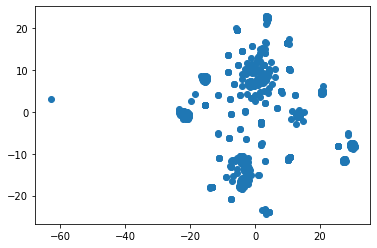

In [44]:
#Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
pca_crypto_df['x'] = tsne_features[:,0]
pca_crypto_df['y'] = tsne_features[:,1]
plt.scatter(pca_crypto_df['x'], pca_crypto_df['y'])
plt.show()

There appear to be a few clusters of data on the scatterplot shown above.

### Cluster Analysis with k-Means

In [45]:
inertia = []
k = list(range(1, 11))

#Use a for-loop to determine the inertia for each k between 1 through 10
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_crypto_df)
    inertia.append(km.inertia_)


C:\Users\rober\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [46]:
#Create a dataframe from the inertia data
k_inertia = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(k_inertia)
elbow_df.head()

,k,inertia
0,1,211222.161037
1,2,147071.622282
2,3,101743.624702
3,4,77742.771426
4,5,70609.364414


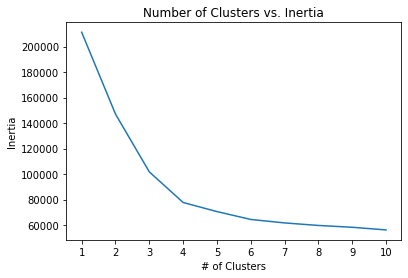

In [49]:
#Create an elbow plot to identify the best number of clusters.
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia')
plt.show()

BAsed upon the line chart above showing number of clusters vs. inertia, the line appears to change trajectory with a k-value of 3-4.

### Recommendation

Based on the data anaylsis and visualizations above, it appears that the cryptocurrencies can be clustered together (although not all data will be captured in the clusters). There appears to be two larger/main clusters, with two other smaller, less-compact clusters shown in the dataset.